Experiment Objective : Is destructive interference between two driven resonator induced Cross-Kerr with different bus resonator mode

In [1]:
import numpy as np
from pprint import pprint


from laboneq.contrib.example_helpers.generate_descriptor import generate_descriptor
#from laboneq.contrib.example_helpers.generate_device_setup import generate_device_setup
from laboneq.dsl.device import DeviceSetup




descriptor = generate_descriptor(
    #pqsc=[""], # 장비 여러개 사용시
    shfqc_6=["DEV12256"],
    number_data_qubits=5,
    multiplex=True,
    number_multiplex=5,
    include_cr_lines=True,
    include_ef_lines=True,
    get_zsync=False,  # Only set to True when using real device
    save = True,
    filename="TG_KAIST",
    ip_address="192.168.0.83"
)


#descriptor
setup = DeviceSetup.from_descriptor(yaml_text=descriptor, server_host="192.168.0.83")
#setup
setup.instruments[0].device_options = 'SHFQC/PLUS/QC6CH'
#setup.instruments

In [3]:
from laboneq.simple import Session
session = Session(setup)
session.connect(ignore_version_mismatch=True, do_emulation=False)
#session.disconnect()

[2025.11.12 23:24:54.414] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is /home/yalgaeahn/JSAHN/qubit-experiment/examples/laboneq_output/log
[2025.11.12 23:24:54.415] INFO    VERSION: laboneq 2.61.0
[2025.11.12 23:24:54.416] INFO    Connecting to data server at 192.168.0.83:8004
[2025.11.12 23:24:54.437] INFO    Connected to Zurich Instruments LabOne Data Server version 25.07.0.507 at 192.168.0.83:8004
[2025.11.12 23:24:54.470] INFO    Configuring the device setup
[2025.11.12 23:24:54.489] INFO    The device setup is configured


In [ ]:
from qpu_types import TransmonQubit, TransmonQubitParameters
from helper import load_qubit_parameters, save_qubit_parameters
from operations import TransmonOperations
from laboneq.dsl.quantum.qpu import QPU, QuantumPlatform


_loaded_qubits = load_qubit_parameters(filename="latest") 
#qubits = TransmonQubit.from_device_setup(setup) # Also can be done with load_qubit_parameters 
qubits = list(_loaded_qubits.values())


qpu = QPU(quantum_elements=qubits, quantum_operations=TransmonOperations())
#quantum_platform = QuantumPlatform(setup=setup, qpu=qpu)

# qpu.topology.add_edge("bus", "q16", "q17")
# qpu.topology.add_edge("bus", "q17", "q18")
# qpu.topology.add_edge("bus", "q18", "q19")
# qpu.topology.plot()




from laboneq.simple import workflow
folder_store = workflow.logbook.FolderStore("./experiment_store") 
folder_store.activate()
#folder_store.deactivate()
#workflow.logbook.LoggingStore().activate()
#workflow.logbook.LogbookStore().deactivate()


RIP2 module is just a Ramsey measurement with RIP drive

Will use directional coupler on SGCHANNEL/4 + SGCHANNEL/2



- Mode 3 at  6.50680GHz
- Mode 1 at  5.55774GHz 

Mode 1 mediated dynamical ZZ strength is stronger then mode 3 mediated strength

r

In [ ]:
# qubits[2].parameters.readout_integration_delay =2e-7

In [ ]:
#Bus resonator mode 1 frequency
print(qubits[2].parameters.resonance_frequency_ge)
qubits[2].parameters.drive_lo_frequency = 5.6e9

#Bus resonator mode 3 frequency
print(qubits[4].parameters.resonance_frequency_ge) 
qubits[4].parameters.drive_lo_frequency = 6.4e9

In [83]:
qubits[4].parameters

TransmonQubitParameters(
│   custom={},
│   ge_T1=0,
│   ge_T2=0,
│   ge_T2_star=0,
│   ef_T1=0,
│   ef_T2=0,
│   ef_T2_star=0,
│   drive_lo_frequency=6400000000.0,
│   readout_lo_frequency=None,
│   resonance_frequency_ge=6506800000.0,
│   resonance_frequency_ef=None,
│   readout_resonator_frequency=None,
│   resonance_targ_frequency=None,
│   ge_drive_amplitude_pi=0.2,
│   ge_drive_amplitude_pi2=0.1,
│   ge_drive_length=5e-08,
│   ge_drive_pulse={
│   │   'function': 'drag',
│   │   'beta': 0,
│   │   'sigma': 0.25
│   },
│   ef_drive_amplitude_pi=0.2,
│   ef_drive_amplitude_pi2=0.1,
│   ef_drive_length=5e-08,
│   ef_drive_pulse={
│   │   'function': 'drag',
│   │   'beta': 0,
│   │   'sigma': 0.25
│   },
│   cr_drive_amplitude=None,
│   cr_drive_length=None,
│   cr_drive_phase=None,
│   cr_drive_pulse={
│   │   'function': 'GaussianSquareDRAG',
│   │   'sigma': 0.2,
│   │   'risefall_sigma_ratio': 3.0,
│   │   'beta0': 0.0,
│   │   'beta1': 0.0
│   },
│   cr_drive_cancel_amplitude=N

In [1]:
from experiments import rip4

#q = qubits[1]
#temporary_parameters = q.parameters.copy()

#######################################################################

#######################################################################
options = rip4.experiment_workflow.options()
options.update(False)

#print(workflow.show_fields(options))

###################################################################
bus_freq = qubits[2].parameters.resonance_frequency_ge - 45e6+26e6 
bus_amp = 1.0

bus2_freq = qubits[4].parameters.resonance_frequency_ge - 9e6  
bus2_amp = 0.0

rip_drive_controlg = rip4.experiment_workflow(
    session=session,
    qpu=qpu,
    ctrl=qubits[1],
    targ=qubits[0],
    bus=qubits[2], #mode1 
    bus2=qubits[4], #mode3 
    bus_frequency=bus_freq,
    bus_amplitude=bus_amp,
    bus2_frequency=bus2_freq,
    bus2_amplitude=bus2_amp,
    delays=np.linspace(350e-9, 500e-9, 151),
    detunings=0,
    c_prep = "g",
    options=options 
)
rip_drive_controle = rip4.experiment_workflow(
    session=session,
    qpu=qpu,
    ctrl=qubits[1],
    targ=qubits[0],
    bus=qubits[2],
    bus2=qubits[4],
    bus_frequency=bus_freq,
    bus_amplitude=bus_amp,
    bus2_frequency=bus2_freq,
    bus2_amplitude=bus2_amp,
    delays=np.linspace(350e-9, 500e-9, 151),
    detunings=0,
    c_prep = "e",
    options=options 
)

rip_result_control_g = rip_drive_controlg.run()
rip_result_control_e = rip_drive_controle.run()
#qubit_spec_compiled = session.compile(amplitude_rabi.create_experiment(qpu=qpu,qubit=q,amplitudes=amplitudes, options=options))
#print(drag_result.tasks['analysis_workflow'].output)

NameError: name 'qubits' is not defined

In [ ]:
# from laboneq.simple import show_pulse_sheet
# from laboneq.contrib.example_helpers.plotting.plot_helpers import plot_simulation

# show_pulse_sheet(compiled_experiment=rip_result_control_e.tasks["compile_experiment"].output,name='test', interactive=True)
# #plot_simulation(compiled_experiment=rip_result_control_e.tasks["compile_experiment"].output)

In [ ]:
# from helper import load_qubit_parameters, save_qubit_parameters
# save_qubit_parameters(qubits={ qubit.uid : qubit for qubit in qubits}, save_folder="./qubit_parameters/", filename="TG_1112")

In [ ]:
rip_result_control_g.output

In [79]:
rip_data_control_g = rip_result_control_g.output
rip_data_control_e = rip_result_control_e.output

In [80]:
duration = rip_data_control_g.data['q0']['result'].axis[0][0]


phase_control_g = rip_data_control_g.data['q0']['result'].data
phase_control_e = rip_data_control_e.data['q0']['result'].data




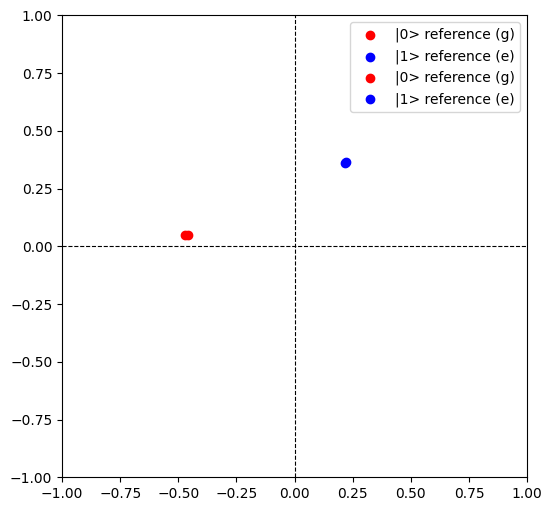

In [81]:
import matplotlib.pyplot as plt

control_g_g_point = rip_data_control_g.data['q0']['cal_trace'].g.data
control_g_e_point = rip_data_control_g.data['q0']['cal_trace'].e.data

control_e_g_point = rip_data_control_e.data['q0']['cal_trace'].g.data
control_e_e_point = rip_data_control_e.data['q0']['cal_trace'].e.data


plt.figure(figsize=(6,6))

plt.scatter(control_g_g_point.real, control_g_g_point.imag, color="red", label="|0> reference (g)")
plt.scatter(control_g_e_point.real, control_g_e_point.imag, color="blue", label="|1> reference (e)")
plt.scatter(control_e_g_point.real, control_e_g_point.imag, color="red", label="|0> reference (g)")
plt.scatter(control_e_e_point.real, control_e_e_point.imag, color="blue", label="|1> reference (e)")

plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.legend()

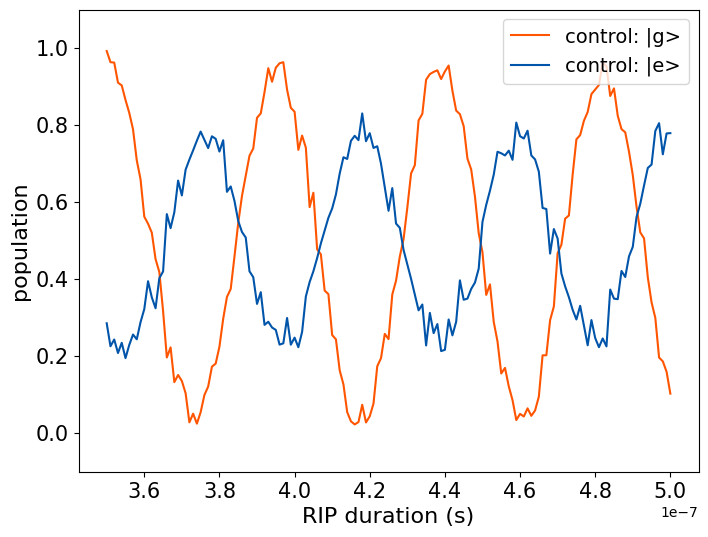

In [82]:
def normalize_population(points, g, e):
    """
    points: list or numpy array of complex numbers
    return: array of normalized values in [0,1]
    """
    points = np.array(points, dtype=complex)
    d0 = np.abs(points - g)
    d1 = np.abs(points - e)
    return d0 / (d0 + d1)

new_phase_control_g = []
new_phase_control_e = []

for i in range(len(phase_control_g)):
    # 2. Calculate the value and append it to the new row
    normalized_value = normalize_population(phase_control_g[i], control_g_g_point, control_g_e_point)
    new_phase_control_g.append(normalized_value)
for k in range(len(phase_control_e)):
    # 2. Calculate the value and append it to the new row
    normalized_value = normalize_population(phase_control_e[k], control_e_g_point, control_e_e_point)
    new_phase_control_e.append(normalized_value)
# 3. Append the completed row to the main population list

population_control_g = new_phase_control_g
population_control_e = new_phase_control_e
plt.figure(figsize=(8,6))
plt.plot(duration, population_control_g, color="#ff5500", label = r'control: |g>')
plt.plot(duration, population_control_e, color="#0055aa", label = r'control: |e>')
plt.ylim([-0.1,1.1])
plt.xlabel("RIP duration (s)", fontsize=16)
plt.ylabel("population", fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(fontsize=14)


In [71]:
from experiments import rip4

#q = qubits[1]
#temporary_parameters = q.parameters.copy()

#######################################################################

#######################################################################
options = rip4.experiment_workflow.options()
options.update(False)

#print(workflow.show_fields(options))
###################################################################
bus_freq = qubits[2].parameters.resonance_frequency_ge 
#bus_freq = 6.502e9
bus_amp = 1.0

bus2_freq = qubits[4].parameters.resonance_frequency_ge - 9e6  
bus2_amp = 0.0


#bus_freq_sweep = np.linspace(6.49e9,6.52e9,61)
bus_freq_sweep = bus_freq + np.linspace(-45e6, 45e6, 46)
ctrl_g = []
ctrl_e = []

for bf in bus_freq_sweep:
    print(f"Bus frequency : {bf/1e9} GHz")
    rip_drive_controlg = rip4.experiment_workflow(
        session=session,
        qpu=qpu,
        ctrl=qubits[1],
        targ=qubits[0],
        bus=qubits[2],
        bus2=qubits[4],
        bus_frequency=bf,
        bus_amplitude=bus_amp,
        bus2_frequency=bus2_freq,
        bus2_amplitude=bus2_amp,
        delays=np.linspace(80e-9, 880e-9, 161),
        detunings=0.0e6,
        c_prep = "g",
        options=options 
    )
    rip_drive_controle = rip4.experiment_workflow(
        session=session,
        qpu=qpu,
        ctrl=qubits[1],
        targ=qubits[0],
        bus=qubits[2],
        bus2=qubits[4],
        bus_frequency=bf,
        bus_amplitude=bus_amp,
        bus2_frequency=bus2_freq,
        bus2_amplitude=bus2_amp,
        delays=np.linspace(80e-9, 880e-9, 161),
        detunings=0.0e6,
        c_prep = "e",
        options=options 
    )

    rip_result_control_g = rip_drive_controlg.run()
    rip_result_control_e = rip_drive_controle.run()

    ctrl_g.append(rip_result_control_g)
    ctrl_e.append(rip_result_control_e)

Bus frequency : 5.51274 GHz
[2025.11.13 01:26:45.120] INFO     ────────────────────────────────────────────────────────────────────────────── 
[2025.11.13 01:26:45.120] INFO      Workflow 'rip4': execution started at 2025-11-12 16:26:45.119802Z             
[2025.11.13 01:26:45.120] INFO     ────────────────────────────────────────────────────────────────────────────── 
[2025.11.13 01:26:45.127] INFO    Task 'temporary_qpu': started at 2025-11-12 16:26:45.127719Z
[2025.11.13 01:26:45.128] INFO    Task 'temporary_qpu': ended at 2025-11-12 16:26:45.128493Z
[2025.11.13 01:26:45.130] INFO    Task 'temporary_quantum_elements_from_qpu': started at 2025-11-12 
[2025.11.13 01:26:45.130] INFO    16:26:45.130268Z
[2025.11.13 01:26:45.131] INFO    Task 'temporary_quantum_elements_from_qpu': ended at 2025-11-12 16:26:45.131094Z
[2025.11.13 01:26:45.132] INFO    Task 'temporary_quantum_elements_from_qpu': started at 2025-11-12 
[2025.11.13 01:26:45.132] INFO    16:26:45.131862Z
[2025.11.13 01:26:45

In [72]:
from laboneq.simple import save, load

bus_freq_sweep * 1e-9


for i, bf in enumerate(bus_freq_sweep *1e-9):
    save(ctrl_g[i].output, filename=f'1112_rip_control_g_bf_{bf:.4f}_amp1.0')
    save(ctrl_e[i].output, filename=f'1112_rip_control_e_bf_{bf:.4f}_amp1.0')


#save(rip_result_control_g.output, filename='1023_control_g_bf_5.535_amp1.0')
#save(rip_result_control_e.output, filename='1023_control_e_bf_5.535_amp1.0')
